In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(precision=5, suppress=True)

In [3]:
df = pd.read_csv('../data/imobiliare_bucuresti.csv')

In [4]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/...
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/...
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/...
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/b...
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/...
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/...
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/...
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/...
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/...


In [5]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']
X = df.iloc[:,1:9]


In [6]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [7]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [8]:
# further process X data maybe
# construct normal eq and determine model coefs (((XtX)^-1)Xt)y (y = x*w => w = y/x)
# validate results (how, when)
# f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N]*w[N] +X[N+1]*w[N+1] | X[N+1] == 1

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

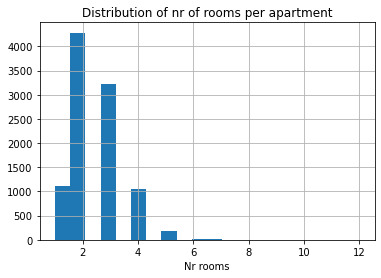

In [10]:
X['nr cam'].hist(bins=20)
plt.xlabel('Nr rooms')
plt.title('Distribution of nr of rooms per apartment')

Text(0.5, 1.0, 'Distribution of apartment surface')

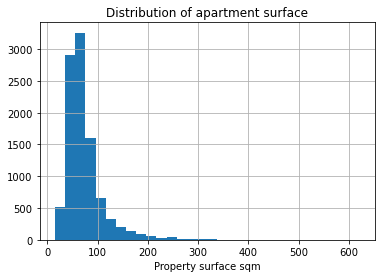

In [11]:
X['mp'].hist(bins=30)
plt.xlabel('Property surface sqm')
plt.title('Distribution of apartment surface')

(array([5637., 2571.,  748.,  335.,  191.,  127.,   71.,   36.,   50.,
          25.,    8.,    6.,   14.,    6.,    3.,   14.,    4.,   17.,
           2.,   10.,    2.,    2.,    2.,    2.,    1.,    3.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    2.,
           0.,    2.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  18000.,   95240.,  172480.,  249720.,  326960.,  404200.,
         481440.,  558680.,  635920.,  713160.,  790400.,  867640.,
         944880., 1022120., 1099360., 1176600., 1253840., 1331080.,
        1408320., 1485560., 1562800., 1640040., 1717280., 1794520.,
        1871760., 1949000., 2026240., 2103480., 2180720., 2257960.,
        2335200., 2412440., 2489680., 2566920., 2644160., 2721400.,
        2798640., 2875880., 2953120., 3030360., 3107600., 3184840.,
        3262080., 3339320., 3416560., 3493800., 3571040., 3648280.,
        3725520., 3802760., 3880000.]),
 <BarContainer o

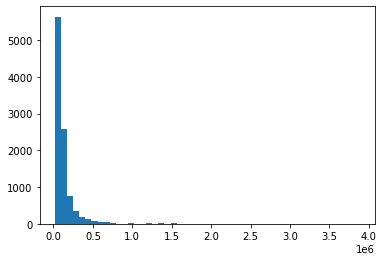

In [12]:
plt.hist(y_price.values, bins=50)

In [13]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [14]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [15]:
df_new = df[new_corr_features]

In [16]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


In [17]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [18]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [19]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [20]:
X.max()

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [21]:
np_X = X.values

In [22]:
np_X

array([[ 2.  , 56.  ,  0.  , ...,  2.  ,  1.  ,  1.  ],
       [ 2.  , 57.  ,  0.  , ...,  2.  ,  0.  ,  1.  ],
       [ 2.  , 67.  ,  0.  , ...,  2.  ,  1.  ,  1.  ],
       ...,
       [ 2.  , 48.  ,  0.  , ...,  4.  ,  0.  ,  0.  ],
       [ 4.  , 83.81,  0.  , ...,  3.  ,  1.  ,  1.  ],
       [ 1.  , 35.  ,  0.  , ...,  4.  ,  1.  ,  1.  ]])

In [23]:
np_X.mean(axis=0)

array([ 2.50571, 73.70487,  0.12569,  0.36183,  0.51248,  3.33647,
        0.71759,  0.59321])

In [24]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [25]:
np_X_n

array([[-0.53209, -0.44072, -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       [-0.53209, -0.41582, -0.37916, ..., -0.47416, -1.59404,  0.8281 ],
       [-0.53209, -0.1669 , -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       ...,
       [-0.53209, -0.63986, -0.37916, ...,  0.23541, -1.59404, -1.20759],
       [ 1.57224,  0.25154, -0.37916, ..., -0.11937,  0.62734,  0.8281 ],
       [-1.58426, -0.96346, -0.37916, ...,  0.23541,  0.62734,  0.8281 ]])

In [26]:
np_y = y_price.values
np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n

array([0.00461, 0.00461, 0.00559, ..., 0.01062, 0.02382, 0.01126])

In [27]:
np_y.min()


18000

In [28]:
np_y.max()

3880000

In [29]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()

In [30]:
np_weights = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)

In [31]:
np_weights

array([-0.00868,  0.04232, -0.00003,  0.00003,  0.00007,  0.00202,
       -0.00217,  0.00101])

In [32]:
np_X_n

array([[-0.53209, -0.44072, -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       [-0.53209, -0.41582, -0.37916, ..., -0.47416, -1.59404,  0.8281 ],
       [-0.53209, -0.1669 , -0.37916, ..., -0.47416,  0.62734,  0.8281 ],
       ...,
       [-0.53209, -0.63986, -0.37916, ...,  0.23541, -1.59404, -1.20759],
       [ 1.57224,  0.25154, -0.37916, ..., -0.11937,  0.62734,  0.8281 ],
       [-1.58426, -0.96346, -0.37916, ...,  0.23541,  0.62734,  0.8281 ]])

In [33]:
np_y_preds = np_X_n.dot(np_weights)

In [34]:
np_y_preds

array([-0.01553, -0.00965, -0.00394, ..., -0.01969, -0.00371, -0.02703])

(array([7571., 1812.,  358.,  102.,   31.,   11.,    5.,    4.,    1.,
           2.]),
 array([-0.05236,  0.00614,  0.06465,  0.12316,  0.18166,  0.24017,
         0.29868,  0.35718,  0.41569,  0.4742 ,  0.5327 ]),
 <BarContainer object of 10 artists>)

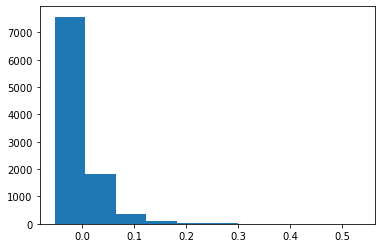

In [35]:
plt.hist(np_y_preds)

In [36]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [37]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb

array([[-0.53209, -0.44072, -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       [-0.53209, -0.41582, -0.37916, ..., -1.59404,  0.8281 ,  1.     ],
       [-0.53209, -0.1669 , -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       ...,
       [-0.53209, -0.63986, -0.37916, ..., -1.59404, -1.20759,  1.     ],
       [ 1.57224,  0.25154, -0.37916, ...,  0.62734,  0.8281 ,  1.     ],
       [-1.58426, -0.96346, -0.37916, ...,  0.62734,  0.8281 ,  1.     ]])

In [38]:
np_weights_b = np.linalg.pinv(np_X_nb.T.dot(np_X_nb)).dot(np_X_nb.T).dot(np_y_n)
np_weights_b

array([-0.00868,  0.04232,  0.00065,  0.00079,  0.00092,  0.00202,
       -0.00217,  0.00101,  0.03028])

In [39]:
np_y_preds2 = np_X_nb.dot(np_weights_b)
np_y_preds2

array([0.01461, 0.02049, 0.0262 , ..., 0.01059, 0.02658, 0.00325])

(array([  20.,  626., 2174., 3021., 1718.,  779.,  430.,  272.,  196.,
         146.,  107.,   98.,   78.,   41.,   35.,   30.,   13.,   27.,
          15.,   16.,   11.,   13.,    4.,    2.,    2.,    4.,    2.,
           2.,    3.,    0.,    1.,    1.,    2.,    0.,    1.,    0.,
           0.,    1.,    1.,    2.,    0.,    0.,    0.,    1.,    0.,
           0.,    1.,    0.,    0.,    1.]),
 array([-0.02222, -0.01052,  0.00119,  0.01289,  0.0246 ,  0.0363 ,
         0.04801,  0.05971,  0.07141,  0.08312,  0.09482,  0.10653,
         0.11823,  0.12993,  0.14164,  0.15334,  0.16505,  0.17675,
         0.18845,  0.20016,  0.21186,  0.22357,  0.23527,  0.24697,
         0.25868,  0.27038,  0.28209,  0.29379,  0.30549,  0.3172 ,
         0.3289 ,  0.34061,  0.35231,  0.36402,  0.37572,  0.38742,
         0.39913,  0.41083,  0.42254,  0.43424,  0.44594,  0.45765,
         0.46935,  0.48106,  0.49276,  0.50446,  0.51617,  0.52787,
         0.53958,  0.55128,  0.56298]),
 <BarContainer o

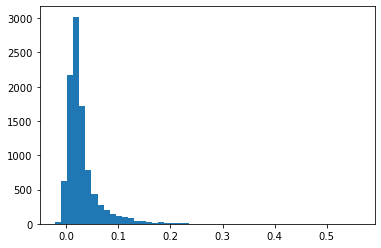

In [40]:
plt.hist(np_y_preds2, bins=50)

In [41]:
np_y_pred2_price = np_y_preds2 * y_norm_div + y_norm_sub
np_y_pred2_price

array([ 74425.07929,  97131.32748, 119181.46438, ...,  58904.35816,
       120634.85121,  30560.87048])

In [42]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [43]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
    }
)
df_result.head(10)

,GOLD,PRED
0,35800,74425.0
1,35800,97131.0
2,39600,119181.0
3,29800,77128.0
4,112900,179446.0
5,37400,111044.0
6,39500,40064.0
7,2350000,1087432.0
8,332000,261197.0
9,39900,126919.0


In [44]:
df_result.tail(10)

,GOLD,PRED
9887,47000,42872.0
9888,34500,-27332.0
9889,56000,29428.0
9890,101000,139525.0
9891,79524,88666.0
9892,85000,170337.0
9893,134999,166609.0
9894,59000,58904.0
9895,110000,120635.0
9896,61500,30561.0


In [45]:
abs_err = np.abs(y_price - np_y_pred2_price)
abs_err

0       38625.079294
1       61331.327476
2       79581.464383
3       47328.146545
4       66546.150310
            ...     
9892    85337.281779
9893    31610.149971
9894       95.641836
9895    10634.851206
9896    30939.129524
Name: Price, Length: 9897, dtype: float64

In [46]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [47]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

,GOLD,PRED,ERR%
0,35800,74425.0,107.89
1,35800,97131.0,171.32
2,39600,119181.0,200.96
3,29800,77128.0,158.82
4,112900,179446.0,58.94
5,37400,111044.0,196.91
6,39500,40064.0,1.43
7,2350000,1087432.0,53.73
8,332000,261197.0,21.33
9,39900,126919.0,218.09


In [48]:
df_result.tail(20)

,GOLD,PRED,ERR%
9877,63000,59456.0,5.63
9878,32900,37746.0,14.73
9879,53490,49239.0,7.95
9880,79000,65093.0,17.60
9881,79900,110802.0,38.68
9882,149000,103109.0,30.80
9883,143000,154312.0,7.91
9884,55000,72024.0,30.95
9885,62860,66983.0,6.56
9886,27500,3890.0,85.85


In [49]:
proc_err.mean()

40.53357145062221

In [ ]:
# split the np_X_nb data into train observation and test observations
# train with NEQ
# present results

In [50]:
def train_neq(inputs, gold):
    weights = np.linalg.pinv(inputs.T.dot(inputs)).dot(inputs.T).dot(gold)
    return weights

def evaluate(theta, inputs, gold, y_div, y_sub, name=""):
    _y_pred = inputs.dot(theta)
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true
    
    overall = prc_err.mean()
    df_result = pd.DataFrame(
        {
        'GOLD' : _y_true,
        'PRED' : _y_vals.round(0),
        'ERR%' : prc_err.round(2)
        }
    )
    print('Results for', name)
    print(df_result.head(20))
    print(df_result.tail(20))
    print("Overall error: {:.1f}%".format(overall * 100))
    return overall

In [51]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(np_X_nb, np_y_n, test_size=0.2)

In [52]:
theta = train_neq(
    inputs=x_trn,
    gold=y_trn
)

In [53]:
theta

array([-0.0081 ,  0.04109, -0.00013, -0.00056, -0.00019,  0.00206,
       -0.00179,  0.00104,  0.03031])

In [54]:
evaluate(
    theta=theta,
    inputs=x_trn,
    gold=y_trn,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TRAIN',
)

Results for TRAIN
        GOLD      PRED  ERR%
0    63000.0   70447.0  0.12
1   349000.0  181943.0  0.48
2   107000.0  112644.0  0.05
3    24950.0    2404.0  0.90
4    97000.0  127503.0  0.31
5    61500.0   59338.0  0.04
6    63000.0   45818.0  0.27
7    44300.0   44556.0  0.01
8   114500.0  113748.0  0.01
9    53200.0   80105.0  0.51
10   58500.0   93611.0  0.60
11  145900.0  111710.0  0.23
12   54289.0  124900.0  1.30
13  318000.0  839650.0  1.64
14  400000.0  482871.0  0.21
15   98175.0  226731.0  1.31
16  415000.0  598687.0  0.44
17   68000.0   99151.0  0.46
18  464000.0  443717.0  0.04
19  198000.0  205962.0  0.04
           GOLD      PRED  ERR%
7897   525000.0  409243.0  0.22
7898   139000.0  258951.0  0.86
7899    29800.0   25759.0  0.14
7900   160000.0  183028.0  0.14
7901    46500.0   38152.0  0.18
7902   145000.0  163825.0  0.13
7903  1180000.0  424950.0  0.64
7904    37700.0   60523.0  0.61
7905    89500.0  172475.0  0.93
7906   185000.0   65653.0  0.65
7907    60000.0  -609

0.39730655396869147

In [55]:
evaluate(
    theta=theta,
    inputs=x_tst,
    gold=y_tst,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TEST',
)

Results for TEST
        GOLD      PRED  ERR%
0   345000.0  397393.0  0.15
1   117000.0  217243.0  0.86
2    59500.0   99509.0  0.67
3    81000.0   86454.0  0.07
4    84000.0  110062.0  0.31
5    79000.0   58399.0  0.26
6   159000.0  119654.0  0.25
7    69500.0   87000.0  0.25
8    72000.0  119091.0  0.65
9    75000.0   92485.0  0.23
10   78000.0   67672.0  0.13
11  970000.0  591222.0  0.39
12   79999.0  229854.0  1.87
13   78000.0  129388.0  0.66
14   70000.0  102640.0  0.47
15  115999.0  114902.0  0.01
16   99000.0   15903.0  0.84
17   87000.0  127503.0  0.47
18   99000.0   90251.0  0.09
19  253000.0  151253.0  0.40
          GOLD      PRED  ERR%
1960   28500.0    6354.0  0.78
1961  180000.0  103292.0  0.43
1962  139999.0  219904.0  0.57
1963   85000.0   93603.0  0.10
1964   78500.0  194138.0  1.47
1965   68095.0   60807.0  0.11
1966  175000.0  170697.0  0.02
1967   40800.0   22935.0  0.44
1968  159000.0  213634.0  0.34
1969  169000.0   92064.0  0.46
1970   52000.0    5694.0  0.89
19

0.4137264153856122

In [123]:
import torch as th

class SimpleLinerRealEstateModel(th.nn.Module):
    def __init__(self, n_feats, n_hid1=32):
        super().__init__()
        self.hidden1 = th.nn.Linear(n_feats, n_hid1)
        self.act1 = th.nn.ReLU()
        self.readout = th.nn.Linear(n_hid1, 1)
        return
    
    def forward(self, inputs):
        th_x = self.hidden1(inputs)
        th_x = self.act1(th_x)
        th_out = self.readout(th_x)
        return th_out


In [224]:
model = SimpleLinerRealEstateModel(8, 256)
model

SimpleLinerRealEstateModel(
  (hidden1): Linear(in_features=8, out_features=256, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=256, out_features=1, bias=True)
)

In [205]:
# construct simple torch dataset
# for each individual batch within dataset
# apply gradient descent
# test the model (mayb validate before within training process)

# then do the same in tensorflow.keras


In [206]:
x_trn.shape

(7917, 9)

In [207]:
x_trn

array([[ 0.52008, -0.29136,  2.63738, ..., -1.59404, -1.20759,  1.     ],
       [ 0.52008,  0.34339, -0.37916, ..., -1.59404,  0.8281 ,  1.     ],
       [-0.53209, -0.39093, -0.37916, ..., -1.59404,  0.8281 ,  1.     ],
       ...,
       [ 0.52008, -0.41582, -0.37916, ...,  0.62734, -1.20759,  1.     ],
       [ 1.57224,  0.65455, -0.37916, ...,  0.62734, -1.20759,  1.     ],
       [-1.58426, -1.03814, -0.37916, ...,  0.62734,  0.8281 ,  1.     ]])

In [208]:
x_tst.shape

(1980, 9)

In [209]:
x_dev = x_tst[:1000,:]
x_test = x_tst[1000:,:]

In [210]:
th_x_trn = th.tensor(x_trn[:,:-1], dtype=th.float32)
th_x_dev = th.tensor(x_dev[:,:-1], dtype=th.float32)
th_x_test = th.tensor(x_test[:,:-1], dtype=th.float32)

In [211]:
th_x_test

tensor([[ 0.5201, -0.1669, -0.3792,  ..., -0.4742, -1.5940, -1.2076],
        [-0.5321, -0.7394, -0.3792,  ..., -0.8289, -1.5940,  0.8281],
        [ 0.5201,  0.4803, -0.3792,  ..., -0.1194,  0.6273,  0.8281],
        ...,
        [ 0.5201, -0.1420, -0.3792,  ..., -0.4742, -1.5940, -1.2076],
        [-0.5321, -0.3411, -0.3792,  ...,  0.5902,  0.6273,  0.8281],
        [-0.5321, -0.3411, -0.3792,  ...,  1.2998, -1.5940, -1.2076]])

In [212]:
y_tst

array([0.08467, 0.02563, 0.01075, ..., 0.01813, 0.01981, 0.01554])

In [213]:
y_dev = y_tst[:1000].reshape(-1,1)
y_test = y_tst[1000:].reshape(-1,1)
y_trn = y_trn.reshape(-1,1)
y_trn[:10]

array([[0.01165],
       [0.08571],
       [0.02305],
       [0.0018 ],
       [0.02046],
       [0.01126],
       [0.01165],
       [0.00681],
       [0.02499],
       [0.00911]])

In [214]:
th_y_trn = th.tensor(y_trn, dtype=th.float32)
th_y_dev = th.tensor(y_dev, dtype=th.float32)
th_y_test = th.tensor(y_test, dtype=th.float32)
th_y_trn

tensor([[0.0117],
        [0.0857],
        [0.0230],
        ...,
        [0.0119],
        [0.0355],
        [0.0036]])

In [215]:
th_y_test.shape

torch.Size([980, 1])

In [216]:
th_x_trn.shape

torch.Size([7917, 8])

In [217]:
BATCH_SIZE = 128
TOTAL_NR_EPOCHS = 100

In [218]:
th_ds = th.utils.data.TensorDataset(th_x_trn, th_y_trn)
th_dl = th.utils.data.DataLoader(th_ds, batch_size=BATCH_SIZE)

In [219]:
for th_x_batch, th_y_batch in th_dl:
    break
th_x_batch

tensor([[ 0.5201, -0.2914,  2.6374,  ..., -1.1837, -1.5940, -1.2076],
        [ 0.5201,  0.3434, -0.3792,  ..., -0.4742, -1.5940,  0.8281],
        [-0.5321, -0.3909, -0.3792,  ...,  0.9450, -1.5940,  0.8281],
        ...,
        [-1.5843, -0.9137, -0.3792,  ...,  1.2998,  0.6273, -1.2076],
        [-0.5321, -0.5154, -0.3792,  ...,  0.2354,  0.6273, -1.2076],
        [ 0.5201,  0.0820, -0.3792,  ...,  0.2354, -1.5940,  0.8281]])

In [220]:
print(th_x_batch.shape)
print(th_y_batch.shape)

torch.Size([128, 8])
torch.Size([128, 1])


In [221]:
def th_evaluate(m, th_inputs, gold, y_div, y_sub, name="", verbose=False):
    m.eval()
    with th.no_grad():
        _y_pred = m(th_inputs).numpy()
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true
    
    overall = prc_err.mean()
    if verbose:
        df_result = pd.DataFrame(
            {
            'GOLD' : _y_true,
            'PRED' : _y_vals.round(0),
            'ERR%' : prc_err.round(2)
            }
        )
        print('Results for', name)
        print(df_result.head(20))
        print(df_result.tail(20))
    print("Overall error for {}: {:.1f}%".format(name, overall * 100))
    m.train()
    return overall

In [226]:
loss_func = th.nn.MSELoss()
# optimizer: weights = weights - alpha * grads # alpha << 1
opt = th.optim.Adam(model.parameters(), lr=5e-5)
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)

In [227]:
best_dev_err = 100
wait_time = 0
max_nr_of_succesive_fails = 2
for epoch in range(TOTAL_NR_EPOCHS):
    for th_x_batch, th_y_batch in th_dl:
        # compute current inferred values with forward prop
        th_y_hat = model(th_x_batch)
        # compute loss (compare results with actual truth)
        th_loss = loss_func(input=th_y_hat, target=th_y_batch) #((th_y_hat - th_y_batch)**2).mean()
        # nullfy the gradients
        opt.zero_grad()
        # compute loss 1st derv wrt all model weights (grads)
        th_loss.backward()
        # apply gradients to weights with a hopefully smart approach
        opt.step()
    # now we evaluate on TRAIN and DEV to see how good we are
    th_evaluate(
        m=model,
        th_inputs=th_x_trn,
        gold=y_trn,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='TRAIN @ Epoch {}'.format(epoch)
    )
    dev_err = th_evaluate(
        m=model,
        th_inputs=th_x_dev,
        gold=y_dev,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='DEV @ Epoch {}'.format(epoch)
    )
    if best_dev_err > dev_err:
        best_dev_err = dev_err
        wait_time = 0
        print("BEST MODEL @ Epoch {}".format(epoch))
    else:
        wait_time += 1
        if wait_time > max_nr_of_succesive_fails:
            print("STOP TRAINING !")
            break

# finally we evaluate on TEST
th_evaluate(
    m=model,
    th_inputs=th_x_test,
    gold=y_test,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    verbose=False,
    name='Final TEST'
)


Overall error for TRAIN @ Epoch 0: 696.4%
Overall error for DEV @ Epoch 0: 725.8%
BEST MODEL @ Epoch 0
Overall error for TRAIN @ Epoch 1: 440.4%
Overall error for DEV @ Epoch 1: 461.7%
BEST MODEL @ Epoch 1
Overall error for TRAIN @ Epoch 2: 352.9%
Overall error for DEV @ Epoch 2: 368.6%
BEST MODEL @ Epoch 2
Overall error for TRAIN @ Epoch 3: 300.2%
Overall error for DEV @ Epoch 3: 310.9%
BEST MODEL @ Epoch 3
Overall error for TRAIN @ Epoch 4: 259.7%
Overall error for DEV @ Epoch 4: 267.4%
BEST MODEL @ Epoch 4
Overall error for TRAIN @ Epoch 5: 225.4%
Overall error for DEV @ Epoch 5: 231.4%
BEST MODEL @ Epoch 5
Overall error for TRAIN @ Epoch 6: 196.2%
Overall error for DEV @ Epoch 6: 201.2%
BEST MODEL @ Epoch 6
Overall error for TRAIN @ Epoch 7: 171.3%
Overall error for DEV @ Epoch 7: 176.1%
BEST MODEL @ Epoch 7
Overall error for TRAIN @ Epoch 8: 150.7%
Overall error for DEV @ Epoch 8: 155.1%
BEST MODEL @ Epoch 8
Overall error for TRAIN @ Epoch 9: 134.2%
Overall error for DEV @ Epoch 9

Overall error for TRAIN @ Epoch 79: 40.3%
Overall error for DEV @ Epoch 79: 42.9%
BEST MODEL @ Epoch 79
Overall error for TRAIN @ Epoch 80: 40.1%
Overall error for DEV @ Epoch 80: 42.8%
BEST MODEL @ Epoch 80
Overall error for TRAIN @ Epoch 81: 39.9%
Overall error for DEV @ Epoch 81: 42.6%
BEST MODEL @ Epoch 81
Overall error for TRAIN @ Epoch 82: 39.7%
Overall error for DEV @ Epoch 82: 42.4%
BEST MODEL @ Epoch 82
Overall error for TRAIN @ Epoch 83: 39.5%
Overall error for DEV @ Epoch 83: 42.2%
BEST MODEL @ Epoch 83
Overall error for TRAIN @ Epoch 84: 39.2%
Overall error for DEV @ Epoch 84: 42.0%
BEST MODEL @ Epoch 84
Overall error for TRAIN @ Epoch 85: 39.0%
Overall error for DEV @ Epoch 85: 41.9%
BEST MODEL @ Epoch 85
Overall error for TRAIN @ Epoch 86: 38.9%
Overall error for DEV @ Epoch 86: 41.7%
BEST MODEL @ Epoch 86
Overall error for TRAIN @ Epoch 87: 38.7%
Overall error for DEV @ Epoch 87: 41.6%
BEST MODEL @ Epoch 87
Overall error for TRAIN @ Epoch 88: 38.5%
Overall error for DEV 

0.3633409635978909

In [113]:
th_loss

tensor(0.0265, grad_fn=<MseLossBackward>)

In [114]:
th_loss2


tensor(0.0265, grad_fn=<MeanBackward0>)

In [101]:
th_p = next(model.parameters())

In [102]:
th_p

Parameter containing:
tensor([[-0.3237, -0.0135,  0.0039,  0.1976, -0.0710,  0.1697, -0.0625,  0.1297],
        [-0.3445,  0.1659, -0.0006,  0.1632, -0.0245, -0.2213, -0.2582,  0.3335],
        [ 0.2090, -0.0180,  0.3157, -0.0739, -0.1897,  0.2394,  0.2573, -0.3424],
        [ 0.2675, -0.3024, -0.2920,  0.0688, -0.1947,  0.1008,  0.0222, -0.2238],
        [-0.2727, -0.0212, -0.0715, -0.0897,  0.1732, -0.1554, -0.3270, -0.2729],
        [ 0.3115,  0.1699, -0.2831, -0.2362,  0.0647,  0.0031, -0.2171, -0.2635],
        [ 0.3292, -0.0841,  0.1267, -0.1887,  0.2347,  0.0825, -0.2841, -0.3204],
        [-0.2087,  0.3115,  0.1408, -0.1852, -0.2997, -0.1595, -0.2179, -0.2679],
        [-0.2799, -0.1589,  0.0369,  0.0104, -0.1110,  0.0779,  0.2486, -0.1360],
        [ 0.2119, -0.0055,  0.1011, -0.0499,  0.1193,  0.2478, -0.0503,  0.1248],
        [ 0.0968, -0.3024, -0.3401,  0.1819,  0.2067,  0.0256,  0.0419,  0.3459],
        [ 0.0976,  0.0354, -0.1622,  0.3426,  0.2328, -0.2502, -0.2256,  0.3

In [117]:
th_p.grad

tensor([[-4.9262e-03, -6.3331e-03, -1.6803e-02,  3.1191e-02, -1.8842e-02,
         -9.0149e-03,  9.4221e-03,  5.1002e-03],
        [-8.8535e-02, -6.1137e-02,  3.3573e-02, -1.0230e-01,  7.6081e-02,
          8.6771e-02, -3.2369e-03, -8.1327e-02],
        [ 3.0522e-02,  1.0876e-02,  6.7817e-02, -3.8839e-03, -4.1244e-02,
         -5.2713e-02,  9.2966e-03, -3.1257e-02],
        [ 3.1581e-03,  4.7247e-04, -1.1438e-02,  3.0346e-02, -2.1588e-02,
         -1.5415e-02, -2.1142e-03,  4.4103e-03],
        [ 2.0384e-03, -4.8277e-04, -1.1842e-03,  6.9161e-04,  1.2053e-04,
         -1.7344e-03, -3.6407e-03, -9.4507e-03],
        [-7.4779e-02, -5.7259e-02, -1.0377e-02,  4.9481e-03,  2.1254e-03,
          2.6047e-02,  4.5602e-02,  1.2375e-02],
        [ 1.2540e-01,  9.3933e-02,  4.0119e-02, -3.9293e-02,  1.1167e-02,
         -3.5118e-02, -3.6726e-02, -3.6721e-02],
        [-5.5664e-03, -3.3949e-03, -3.9546e-03, -1.6501e-03,  4.2091e-03,
          5.1056e-03,  2.1016e-03,  4.9515e-03],
        [ 1.9228

In [118]:
opt.zero_grad()

In [119]:
th_p.grad

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0